In [ ]:
!pip install fastai==2.5.3

In [ ]:
!pip install pillow==9.1.0

In [ ]:
import fastai
import torch
from fastai.vision.all import *
from tqdm import tqdm
from torch.utils.data import dataloader
from ipywidgets import widgets

In [ ]:
!git clone https://github.com/jahongirkb/Echocardiography.git

In [ ]:
path = Path('/content/Echocardiography/DATA_CHAMBER_2021/train')
fls = get_image_files(path)

In [ ]:
echocardiography = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.1, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

# Data loaders
dls = echocardiography.dataloaders(path)

# Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(7) # 7 martta validation qiladi.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export('Echocardiography_model.pkl')

In [ ]:
model = load_learner('/content/Echocardiography_model.pkl')

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: 2C
Extimolligi: 0.9999949932098389


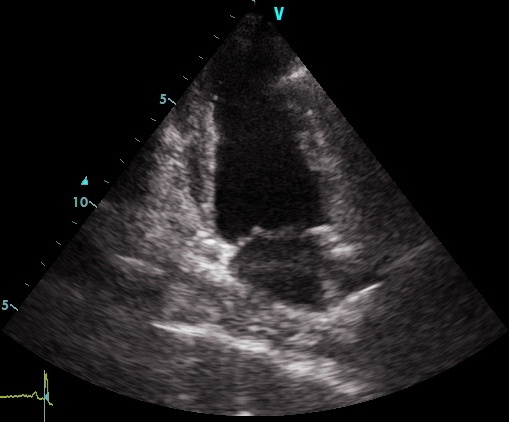

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = model.predict(img)
print(f'Bashorat: {pred}')
print(f'Extimolligi: {probs[pred_id]}')
img

In [ ]:
files = !ls "/content/Echocardiography/3C"
preds = []
numbers = []
for file in tqdm(files):
    number, n_th, probs = model.predict(f"/content/Echocardiography/3C/{file}")
    preds.append(n_th)
    numbers.append(number)

In [ ]:
import PIL
PIL.__version__

'7.1.2'